# WhatsApp Chat Analysis

**Step 1.** Declare RegExp patterns that you want to remove from the chat file. 

In [1]:
import re

mediaPattern = r"(\<Media omitted\>)" # Because it serves no purpose
regexMedia = re.compile(mediaPattern, flags=re.M)

dateAndTimepattern = r"(\d+\/\d+\/\d+)(,)(\s)(\d+:\d+)(\s)(\w+)(\s)(-)(\s\w+)*(:)"
regexDate = re.compile(dateAndTimepattern, flags=re.M)

**Step 2.** Define a function that will remove the artefacts, and return the chat file split into lines.

In [2]:
def cleanText(filename):    
    # encoding will allow for easier pasrsing of files
    chat = open(filename, encoding="utf8")
    chatText = chat.read()
    chat.close()

    # 01/03/22, 11:34 PM - Amfa:

    """
    Removes the matches and 
    replace them with an empty string
    """
    chatText = regexMedia.sub("", chatText)
    chatText = regexDate.sub("", chatText)

    lines = []

    for line in chatText.splitlines():
        if line.strip() is not "": # If it's empty, we don't need it
            lines.append(line.strip())

    return lines

<>:19: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:19: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\GOH15\AppData\Local\Temp\ipykernel_11520\2731680370.py:19: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line.strip() is not "": # If it's empty, we don't need it


**Step 3.** Import Dependencies for the actual shenanigans.

In [3]:
import sys
import matplotlib.pyplot as plt
import nltk
from utilities import cleanText 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

d:\LINKEDIN LEARNING\1. INNE\Whatsapp Chat Analysis\utilities.py:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line.strip() is not "": # If it's empty, we don't need it


**Step 4.** Define an analyze method that takes in the name of the chat file, and then performs magic (through code.)

In [4]:
def analyze(name):
    linesList = cleanText(name + '.txt')
    neutral, negative, positive = 0, 0, 0

    for index, sentence in enumerate(linesList):
        if re.match(r'^[\w]', sentence) is None:
            continue
        scores = sentiment_analyzer.polarity_scores(sentence)
        scores.pop('compound', None)

        maxAttribute = max(scores, key=lambda k: scores[k])

        if maxAttribute == "neu":
            neutral += 1
        elif maxAttribute == "neg":
            negative += 1
        else:
            positive += 1

    total = neutral + negative + positive
    print("Negative: {0}% | Neutral: {1}% | Positive: {2}%".format(
        negative*100/total, neutral*100/total, positive*100/total))

    labels = 'Neutral', 'Negative', 'Positive'
    sizes = [neutral, negative, positive]
    colors = ['#00bcd7', '#F57C00', '#CDDC39']

    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)

    plt.axis('equal')
    plt.title("Sentiment Analysis - Chat with {0}".format(name.capitalize()))
    plt.show()

In [5]:
%matplotlib inline

Negative: 0.0% | Neutral: 100.0% | Positive: 0.0%


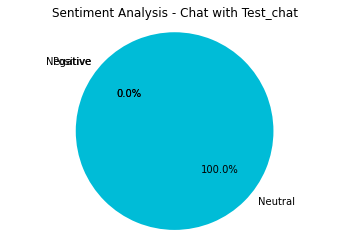

In [6]:
# the name of the txt file to be analyzed
analyze("test_chat")